### Apply supervised learning algorithm support vector machines on olivettit

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
faces = fetch_olivetti_faces()

In [4]:
print faces.DESCR

Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [5]:
print faces.keys()

['images', 'data', 'target', 'DESCR']


In [6]:
print faces.images.shape

(400L, 64L, 64L)


In [7]:
print faces.data.shape

(400L, 4096L)


In [8]:
print faces.target.shape

(400L,)


In [9]:
print np.max(faces.data)
print np.min(faces.data)
print np.mean(faces.data)

1.0
0.0
0.547043


No need for normalization as values are between 0-1

In [10]:
def print_faces(images,target,top_n):
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left =0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i],cmap=plt.cm.bone)
        p.text(0,14,str(target[i]))
        p.text(0,60,str(i))

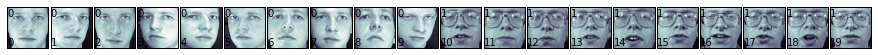

In [11]:
print_faces(faces.images,faces.target,20)

## Training support vector machine

In [12]:
from sklearn.svm import SVC

In [13]:
svc_1 = SVC(kernel='linear')

In [14]:
from sklearn.cross_validation import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(faces.data,faces.target,
                                                test_size=0.25,random_state=0)

In [16]:
print X_train.shape,X_test.shape

(300L, 4096L) (100L, 4096L)


### K fold cross validation

In [17]:
from sklearn.cross_validation import cross_val_score,KFold
from scipy.stats import sem

In [18]:
def evalulate_cross_validation(clf,X,y,K):
    cv = KFold(len(y),K,shuffle=True,random_state=0)
    scores = cross_val_score(clf,X,y,cv=cv)
    print scores
    print ("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), 
                                                      sem(scores))

In [19]:
evalulate_cross_validation(svc_1,X_train,y_train,5)

[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]
Mean score: 0.913 (+/-0.012)


#### Model Evaluation

In [20]:
from sklearn import metrics

In [21]:

def train_and_evaluate(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    print clf.score(X_train,y_train)
    print clf.score(X_test,y_test)
    
    y_pred = clf.predict(X_test)
    print metrics.classification_report(y_test,y_pred)
    print metrics.confusion_matrix(y_test,y_pred)

In [22]:
train_and_evaluate(svc_1,X_train,X_test,y_train,y_test)

1.0
0.99
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19       1.00      1.00      1.00         4
         20       1.00      1.00    

### Classify people with and without glasses

In [23]:
glasses = [
(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
(330, 339), (358, 359), (360, 369)
]

In [24]:
def create_target(segments):
    y = np.zeros(faces.target.shape[0])
    for (start,end) in segments:
        y[start:end + 1] = 1
    return y

In [25]:
target_glasses = create_target(glasses)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    faces.data, target_glasses, test_size=0.25, random_state=0)

In [27]:
svc_2 = SVC(kernel='linear')

In [28]:
evalulate_cross_validation(svc_2,X_train,y_train,5)

[ 1.          0.95        0.98333333  0.98333333  0.93333333]
Mean score: 0.970 (+/-0.012)


In [29]:
train_and_evaluate(svc_2,X_train,X_test,y_train,y_test)

1.0
0.99
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        67
        1.0       0.97      1.00      0.99        33

avg / total       0.99      0.99      0.99       100

[[66  1]
 [ 0 33]]


In [30]:
X_test = faces.data[30:40]
y_test = target_glasses[30:40]
print y_test.shape[0]

10


In [31]:
select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]
print y_train.shape[0]

390


In [32]:
svc_3 = SVC(kernel='linear')
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)

1.0
0.9
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91         5
        1.0       1.00      0.80      0.89         5

avg / total       0.92      0.90      0.90        10

[[5 0]
 [1 4]]


In [36]:
y_pred = svc_3.predict(X_test)
eval_faces = [np.reshape(a,(64,64)) for a in X_test]

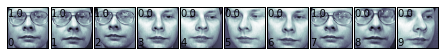

In [37]:
print_faces(eval_faces, y_pred, 10)